In [112]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import scipy
import numpy as np
%matplotlib inline

Essas são visualizações relacionadas aos experimentos ao variar a quantidade da população e o número de gerações usando do Seleção por Roleta.

A quantidade de indivíduos foi de 50, 100 e 500. Para cada um deles, variou-se o número de gerações entre 50, 100 e 500.

# 1 - Fitness por Execução

In [3]:
results_folder_path = pathlib.Path('../../results/')

## 1.1 - População de 50 indivíduos

In [4]:
def get_fitness_data_per_config(folders_paths) -> list[dict]:
    data_per_config = dict()
    for target_folder in folders_paths:
        fitness_stats_path = target_folder / 'fitness_stats.csv'
        print(fitness_stats_path)
        stats_df = pd.read_csv(fitness_stats_path)
        config_name = str(target_folder).split('/')[-1].split('_')[1]
        data_per_config[config_name] = stats_df
    return data_per_config

In [60]:
pop_50_results_folders = list(results_folder_path.glob("synth1/50pop*"))
data_per_config50 = get_fitness_data_per_config(pop_50_results_folders)

../../results/synth1/50pop_100gen/fitness_stats.csv
../../results/synth1/50pop_50gen/fitness_stats.csv
../../results/synth1/50pop_500gen/fitness_stats.csv


In [6]:
data_per_config50['100gen'].head()

,train_fit,test_fit,train_time_seconds,random_seed
0,10.200507,20.932391,6.154871,520
1,11.105805,14.700084,3.323086,920
2,19.036678,26.701588,1.171833,235
3,10.162777,24.433944,2.669072,473
4,18.808725,26.031952,3.136117,175


In [7]:
def plot_fitness_results(data_dict, num_inds, num_runs=30, base_dados='synth1'):
    train_data_colors = {'100gen':'red', 
                     '50gen':'green', 
                     '500gen':'grey'}

    test_data_colors = {'100gen':'orange', 
                     '50gen':'cyan', 
                     '500gen':'black'}

    x = range(num_runs)
    fig, ax = plt.subplots(figsize=(9, 6))
    for config, data in data_dict.items():
            ax.plot(x, data['train_fit'], color=train_data_colors[config], label=config+" train")
            ax.plot(x, data['test_fit'], color=test_data_colors[config], label=config+" test")

    plt.title(f"Melhor Fitness treino e teste base {base_dados} para {num_inds} indivíduos")
    plt.xlabel("Número da Execução")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

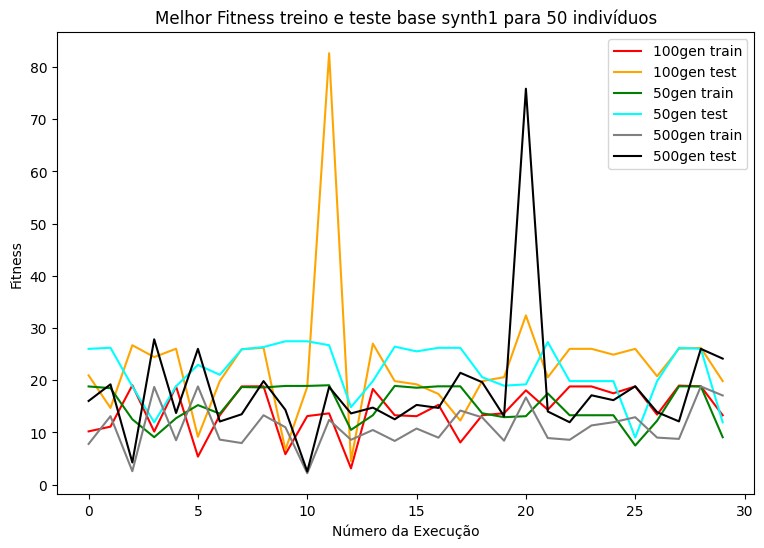

In [8]:
plot_fitness_results(data_per_config50, num_inds=50)

In [12]:
def get_trimmed_mean_train_test_fitness(data_dict, trim=0.05)-> dict[str, dict]:
    config_dict_results = dict()
    for config, data in data_dict.items():
        config_dict_results[config] = dict()
        config_dict_results[config]['train'] = scipy.stats.trim_mean(data.train_fit, trim)
        config_dict_results[config]['test'] = scipy.stats.trim_mean(data.test_fit, trim)
    return config_dict_results

In [13]:
pop50_mean_results = get_trimmed_mean_train_test_fitness(data_per_config50)
pop50_mean_results

{'100gen': {'train': 14.467464174698208, 'test': 21.57786489607808},
 '50gen': {'train': 15.375274034404544, 'test': 22.169992865179474},
 '500gen': {'train': 11.096774586359334, 'test': 16.59742569803297}}

De acordo com os resultados, para a população de 50 indivíduos, ao usar 500 indivíduos, conseguimos os melhores resultados, o que já era esperado. Os resultados de treino e teste para 50 e 100 gerações ficaram perto uns dos outros.

## 1.2 - População de 100 indivíduos

In [61]:
pop_100_results_folders = list(results_folder_path.glob("synth1/100pop*_*gen/"))
data_per_config100 = get_fitness_data_per_config(pop_100_results_folders)

../../results/synth1/100pop_50gen/fitness_stats.csv
../../results/synth1/100pop_500gen/fitness_stats.csv
../../results/synth1/100pop_100gen/fitness_stats.csv


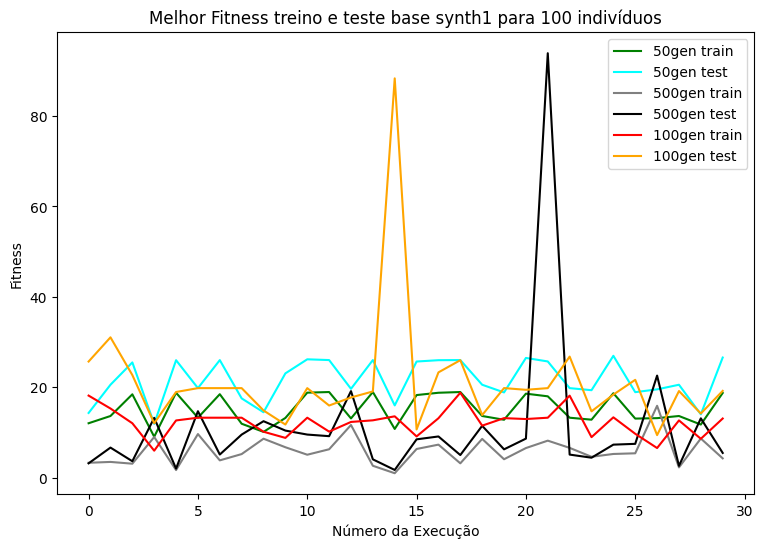

In [40]:
plot_fitness_results(data_per_config100, num_inds=100)

In [41]:
pop100_mean_results = get_trimmed_mean_train_test_fitness(data_per_config100)
pop100_mean_results

{'50gen': {'train': 15.23048844765593, 'test': 21.778388374994716},
 '500gen': {'train': 5.80026628373831, 'test': 8.600472132319073},
 '100gen': {'train': 12.285011695496053, 'test': 19.164955870640195}}

Para 100 indivíduos, temos o mesmo movimento que em 50 indivíduos. Com 500 gerações, temos uma diferença muito grande de resultado para as outras configurações.

## 1.3 - População de 500 indivíduos

In [62]:
pop_500_results_folders = list(results_folder_path.glob("synth1/500pop*"))
data_per_config500 = get_fitness_data_per_config(pop_500_results_folders)

../../results/synth1/500pop_50gen/fitness_stats.csv
../../results/synth1/500pop_500gen/fitness_stats.csv
../../results/synth1/500pop_100gen/fitness_stats.csv


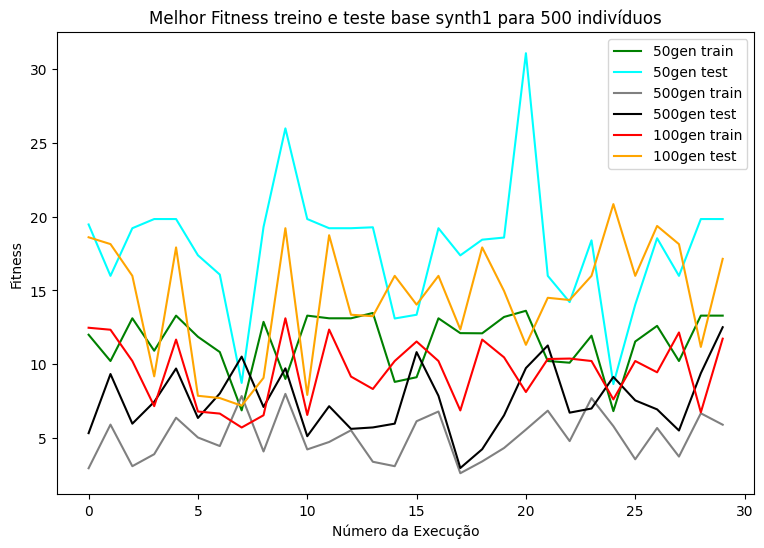

In [43]:
plot_fitness_results(data_per_config500, num_inds=500)

In [44]:
pop500_mean_results = get_trimmed_mean_train_test_fitness(data_per_config500)
pop500_mean_results

{'50gen': {'train': 11.627972660334677, 'test': 17.719385687052338},
 '500gen': {'train': 5.060073013295159, 'test': 7.567490736081596},
 '100gen': {'train': 9.579596521604008, 'test': 14.503686409631587}}

Os resultados também melhoram quanto mais gerações permitimos ao algoritmo. De acordo com a média aparada, os resultados obtidos com 500 gerações são levemente melhores do que para o mesmo número de gerações e 100 indivíduos.

[]

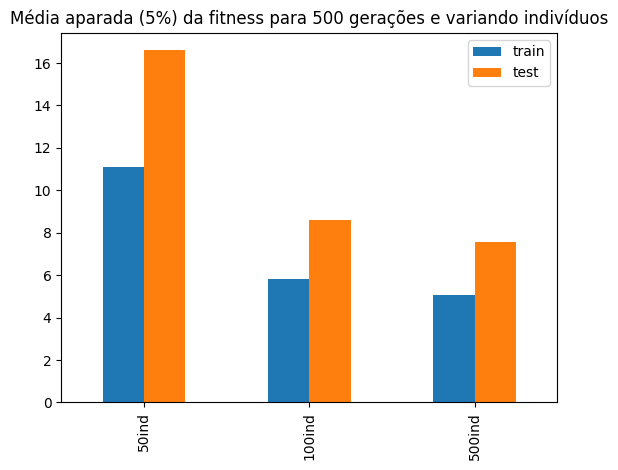

In [45]:
target_config = '500gen'
dicts_list = [pop50_mean_results, pop100_mean_results, pop500_mean_results]
train_stats = [data[target_config]['train'] for data in dicts_list]
test_stats = [data[target_config]['test'] for data in dicts_list]
train_test_fits_df = pd.DataFrame({'train':train_stats, 'test':test_stats}, index=['50ind', '100ind', '500ind'])
axs = train_test_fits_df.plot(kind='bar')
axs.set_title("Média aparada (5%) da fitness para 500 gerações e variando indivíduos")
axs.plot()

# 2 - Tempo de execução

In [46]:
def get_trimmed_mean_train_time(data_dict, trim=0.05)-> dict[str, dict]:
    config_dict_results = dict()
    for config, data in data_dict.items():
        config_dict_results[config] = scipy.stats.trim_mean(data.train_time_seconds, trim)
    return config_dict_results

In [47]:
pop50_mean_time = get_trimmed_mean_train_time(data_per_config50)
pop100_mean_time = get_trimmed_mean_train_time(data_per_config100)
pop500_mean_time = get_trimmed_mean_train_time(data_per_config500)
pop50_mean_time

{'100gen': 3.1324140770094737,
 '50gen': 1.3540776371955872,
 '500gen': 29.60532514538084}

In [48]:
df_dict = {}
times_dicts_list = [pop50_mean_time, pop100_mean_time, pop500_mean_time]
for target_config in ['50gen', '100gen', '500gen']:
    df_dict[target_config] = [data[target_config] for data in times_dicts_list]

train_times_df = pd.DataFrame(df_dict, index=['50ind', '100ind', '500ind'])
train_times_df

,50gen,100gen,500gen
50ind,1.354078,3.132414,29.605325
100ind,2.464311,6.093323,53.540892
500ind,8.943385,16.907593,112.365823


Text(0, 0.5, 'Tempo execução médio (s)')

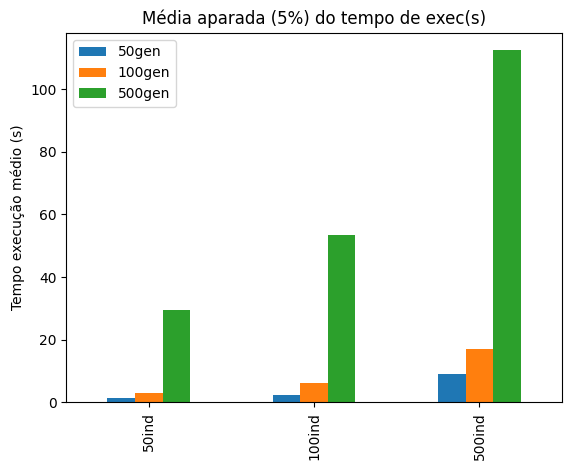

In [49]:
axs = train_times_df.plot(kind='bar')
axs.set_title("Média aparada (5%) do tempo de exec(s)")
axs.set_ylabel("Tempo execução médio (s)")

O ganho de escolher 500 indivíduos sobre 100 usando de 500 gerações é muito baixo levando em consideração que o tempo de execução médio mais do que dobra. Dessa forma, vale mais a pena usar de 100 indivíduos.

# 3 - Seeds dos melhores resultados para teste

As seeds que foram usadas para gerar os melhores resultados com 500 gerações para cada indivíduo foram:

In [50]:
def get_best_test_line_for_gen(num_gens):
    target = f'{num_gens}gen'
    config50 = data_per_config50[target]
    config100 = data_per_config100[target]
    config500 = data_per_config500[target]
    print(f"Melhor linha para 50 indivíduos: ")
    print(config50[config50.test_fit == config50.test_fit.min()])
    print(f"Melhor linha para 100 indivíduos: ")
    print(config100[config100.test_fit == config100.test_fit.min()])
    print(f"Melhor linha para 500 indivíduos: ")
    print(config500[config500.test_fit == config500.test_fit.min()])

In [51]:
get_best_test_line_for_gen(50)

Melhor linha para 50 indivíduos: 
    train_fit  test_fit  train_time_seconds  random_seed
25   7.490566    9.0253            1.924038          808
Melhor linha para 100 indivíduos: 
   train_fit   test_fit  train_time_seconds  random_seed
3   9.087834  11.928999             4.58082          299
Melhor linha para 500 indivíduos: 
    train_fit  test_fit  train_time_seconds  random_seed
24   6.825072  8.657244            7.779437          785


In [52]:
get_best_test_line_for_gen(100)

Melhor linha para 50 indivíduos: 
    train_fit  test_fit  train_time_seconds  random_seed
12    3.12591  4.504156            6.960513           43
Melhor linha para 100 indivíduos: 
    train_fit  test_fit  train_time_seconds  random_seed
26   6.586874  9.442578            9.457182          356
Melhor linha para 500 indivíduos: 
   train_fit  test_fit  train_time_seconds  random_seed
7   5.716705  7.192583           15.678088          670


In [53]:
get_best_test_line_for_gen(500)

Melhor linha para 50 indivíduos: 
    train_fit  test_fit  train_time_seconds  random_seed
10   2.185517  2.512419            24.00995          106
Melhor linha para 100 indivíduos: 
    train_fit  test_fit  train_time_seconds  random_seed
14   1.018772  1.740526           58.360054          568
Melhor linha para 500 indivíduos: 
    train_fit  test_fit  train_time_seconds  random_seed
17   2.620305  2.972889          167.164765          299


# 4 - Fitness ao longo das 500 gerações

In [83]:
def get_500_gen_stats_df_dict_by_run_of_folder(base_folder):
    for folder in list(base_folder):
        if str(folder).split("_")[-1] == '500gen':
            files = list(folder.glob("stats*"))
            stats_dict = dict()
            for file in files:
                file_num = str(file).split('_')[-1].split('.')[0]
                stats_dict[int(file_num)] = pd.read_csv(file)
            return stats_dict

In [84]:
pop_50_stats_by_run = get_500_gen_stats_df_dict_by_run_of_folder(pop_50_results_folders)
pop_100_stats_by_run = get_500_gen_stats_df_dict_by_run_of_folder(pop_100_results_folders)
pop_500_stats_by_run = get_500_gen_stats_df_dict_by_run_of_folder(pop_500_results_folders)

In [123]:
def get_line_and_col_of_runs(df_dict, target_line, target_cols:list):
    results_list_of_dicts = list()
    for df_num, df in df_dict.items():
        results_list_of_dicts.append(df.iloc[target_line][target_cols].to_dict())
    
    return pd.DataFrame(results_list_of_dicts)
def get_col_stats_from_dfs_dict(df_dict, target_col):
    records_list = list()
    for gen in range(500):
        curr_values = get_line_and_col_of_runs(df_dict, gen, [target_col]).values.flatten()
        min_value = np.min(curr_values)
        max_value = np.max(curr_values)
        mean_value = np.mean(curr_values)
        new_record = {'min_value':min_value, 'max_value':max_value, 'mean_value':mean_value}
        records_list.append(new_record)

    return pd.DataFrame.from_records(records_list)

In [122]:
best_fit_per_gen_50_pop_df = get_col_stats_from_dfs_dict(pop_50_stats_by_run, 'best_fit')
best_fit_per_gen_100_pop_df = get_col_stats_from_dfs_dict(pop_100_stats_by_run, 'best_fit')
best_fit_per_gen_500_pop_df = get_col_stats_from_dfs_dict(pop_500_stats_by_run, 'best_fit')

In [145]:
def plot_fill_between(stats_df, my_axs, label:str):
    x = range(len(stats_df))
    y = stats_df['mean_value']
    y1 = stats_df['min_value']
    y2 = stats_df['max_value']
    my_axs.plot(x, y, '-', label=label)
    my_axs.fill_between(x, y1, y2, alpha=0.2)

Text(0.5, 1.0, 'Best Fitness média (com max e min) ao longo das gerações entre 30 execuções')

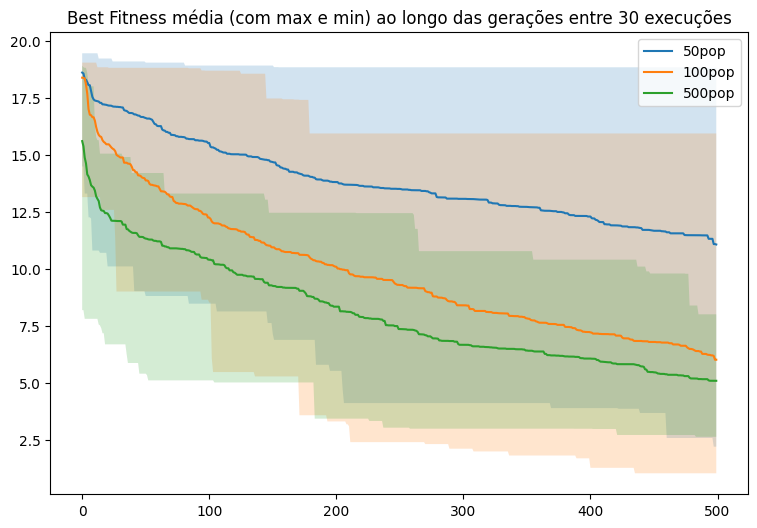

In [147]:
fig, ax = plt.subplots(figsize=(9, 6))
plot_fill_between(best_fit_per_gen_50_pop_df, ax, '50pop')
plot_fill_between(best_fit_per_gen_100_pop_df, ax, '100pop')
plot_fill_between(best_fit_per_gen_500_pop_df, ax, '500pop')

ax.legend()
ax.set_title("Best Fitness média (com max e min) ao longo das gerações entre 30 execuções")